In [27]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [28]:
path = "/Users/ilyaskussanov/Documents/GitHub/Financial_Sentiment_LLM/03_Sentiment_Analysis/Revised_notebooks/Full_data_LLama_model_sentiment_analysis_results.csv"
df = pd.read_csv(path)

# Create a dictionary to map old column names to new ones
column_mapping = {
    'Finance': 'Finance',
    'Production': 'Production',
    'Reserves / Exploration / Acquisitions / Mergers / Divestments': 'Reserves/M&A',
    'Environment / Regulatory / Geopolitics': 'Regulatory',
    'Alternative Energy / Lower Carbon': 'Green Energy',
    'Oil Price / Natural Gas Price / Gasoline Price': 'OG Price'
}

# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# Update the sentiment_columns list with the new names
sentiment_columns = ['Finance', 'Production', 'Reserves/M&A', 'Regulatory', 'Green Energy', 'OG Price']



In [29]:
# 1. Check for inconsistency in all sentiment categories
def check_sentiment_consistency(value):
    valid_sentiments = ['Positive', 'Neutral', 'Negative', 'No JSON found']
    return value in valid_sentiments

# Check inconsistency across all sentiment categories
inconsistent_data = df[sentiment_columns].map(lambda x: not check_sentiment_consistency(x))
inconsistent_counts = inconsistent_data.sum()

print("Inconsistent sentiment values:")
print(inconsistent_counts)

Inconsistent sentiment values:
Finance           87
Production       223
Reserves/M&A     285
Regulatory       411
Green Energy    2090
OG Price         443
dtype: int64


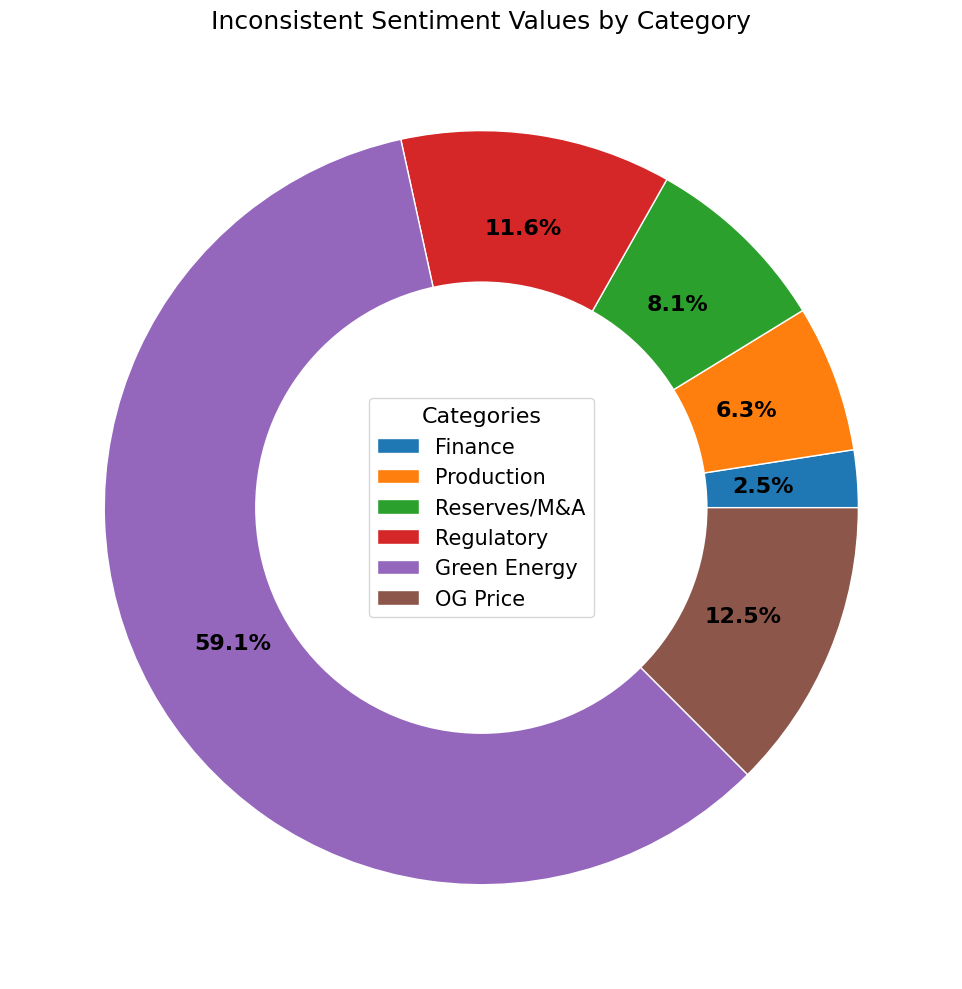

Finance: 87 (2.5%)
Production: 223 (6.3%)
Reserves/M&A: 285 (8.1%)
Regulatory: 411 (11.6%)
Green Energy: 2090 (59.1%)
OG Price: 443 (12.5%)


In [30]:

# Visualize inconsistent values
plt.figure(figsize=(12, 10))  # Increased figure size for larger legend

# Create color map using blues
# Define a set of standard, colorblind-friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create the pie chart with a slight separation between wedges
wedges, texts, autotexts = plt.pie(inconsistent_counts, 
                                   labels=None,  # Remove labels from wedges
                                   autopct='%1.1f%%',
                                   pctdistance=0.75,
                                   colors=colors,
                                   wedgeprops=dict(width=0.5, edgecolor='white'))

# Adjust the size and color of percentage labels
plt.setp(autotexts, size=16, weight="bold", color="black")

# Add a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Inconsistent Sentiment Values by Category', fontsize=18)

# Adjust legend with increased font size
plt.legend(wedges, inconsistent_counts.index,
           title="Categories",
           loc="center",
           bbox_to_anchor=(0, 0, 1, 1),
           fontsize=15,  # Increased font size
           title_fontsize=16)  # Increased title font size

plt.tight_layout()
plt.show()

# Print the actual counts and percentages
total = inconsistent_counts.sum()
for category, count in inconsistent_counts.items():
    percentage = (count / total) * 100
    print(f"{category}: {count} ({percentage:.1f}%)")

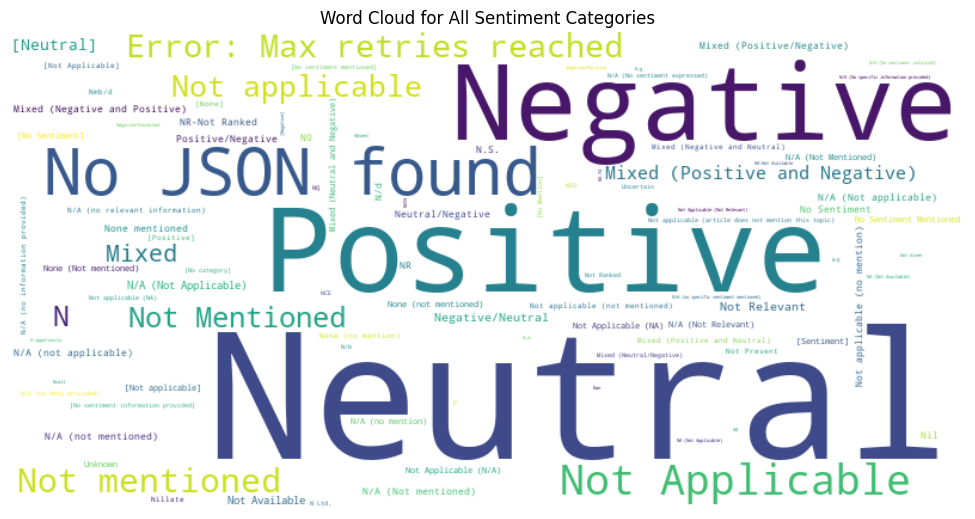


Top 20 most frequent sentiments across all categories:
Neutral                          35186
Positive                         11138
Negative                          8895
No JSON found                     1992
Not Applicable                     563
Not mentioned                      338
Error: Max retries reached         318
Not applicable                     264
Not Mentioned                      239
N                                  226
Mixed                              168
Mixed (Positive and Negative)       85
[Neutral]                           67
Not Relevant                        41
Negative/Neutral                    37
N/A (Not Applicable)                33
Not Available                       32
NR                                  27
N.S.                                25
Positive/Negative                   24
Name: count, dtype: int64


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df and sentiment_columns are already defined

# Combine all sentiment categories into a single series
all_sentiments = pd.Series([item for sublist in [df[col].tolist() for col in sentiment_columns] for item in sublist])

# Create a dictionary of word frequencies
word_freq = all_sentiments.value_counts().to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Sentiment Categories')
plt.tight_layout(pad=0)
plt.show()

# Print the top 20 most frequent sentiments
print("\nTop 20 most frequent sentiments across all categories:")
print(all_sentiments.value_counts().head(20))

In [34]:
# 1. Create a copy of the dataframe
df_standardized = df.copy()
# 2. Generate list of unique values per each category
for column in sentiment_columns:
    print(f"\nUnique values in {column}:")
    unique_values = df_standardized[column].unique()
    print(unique_values)
    print(f"Total unique values in {column}: {len(unique_values)}")


Unique values in Finance:
['Neutral' 'Positive' 'Negative' '[Neutral]' 'NR' 'N' 'NR-Not Ranked'
 'Error: Max retries reached' '[Positive]' 'N1B' 'NES' 'Mixed' 'N Relic'
 'No JSON found']
Total unique values in Finance: 14

Unique values in Production:
['Positive' 'Neutral' 'Negative'
 'Positive (small increase in U.S. production, likely 300,000 b/d to an estimated 13.2 mmb/d)'
 'Mixed (Positive and Negative)' 'Negative/Positive (Mixed Sentiment)'
 '[Neutral]' 'Slight Negative'
 'Positive (6.0% increase in crude oil production, 7.3% increase in NGL production)'
 'Positive (median increase of 0.4% in crude oil production, 5.1% in NGL production, and 4.8% in natural gas production)'
 'N-Q'
 'Positive (2.1% increase in crude oil production, 7.3% increase in natural gas production)'
 'Positive (6.4% increase expected)'
 'Mixed (Positive for crude oil, Neutral for NGL, Positive for natural gas)'
 'Negative (3.0% decrease in NGL production and 0.7% increase in crude oil production expected)'

In [33]:
def improved_standardize_sentiment(value):
    value = str(value).lower()
    
    # Positive sentiments
    if any(word in value for word in ['positive', 'increase', 'growth', 'improve', 'higher']):
        return 'Positive'
    
    # Negative sentiments
    elif any(word in value for word in ['negative', 'decrease', 'decline', 'lower', 'risk', 'concern']):
        return 'Negative'
    
    # Neutral sentiments
    elif any(word in value for word in ['neutral', 'unchanged', 'stable', 'mixed']):
        return 'Neutral'
    
    # Mixed sentiments
    elif 'mixed' in value or ('positive' in value and 'negative' in value):
        return 'Mixed'
    
    # Not Applicable categories
    elif any(phrase in value for phrase in ['no json found', 'n/a', 'not applicable', 'not mentioned', 'no mention', 'none', 'not relevant']):
        return 'Not Applicable'
    
    # Error categories
    elif 'error' in value:
        return 'Error'
    
    # If none of the above, categorize as Other
    else:
        return 'Other'

# Apply the improved standardization to each sentiment column
for column in sentiment_columns:
    df_standardized[column] = df_standardized[column].apply(improved_standardize_sentiment)

# Print standardized value counts for each category
for column in sentiment_columns:
    print(f"\nStandardized value counts for {column}:")
    print(df_standardized[column].value_counts())


Standardized value counts for Finance:
Finance
Neutral           6739
Positive          2077
Negative           895
Not Applicable     332
Error               53
Other               29
Name: count, dtype: int64

Standardized value counts for Production:
Production
Neutral           4991
Positive          3079
Negative          1614
Not Applicable     341
Error               53
Other               47
Name: count, dtype: int64

Standardized value counts for Reserves/M&A:
Reserves/M&A
Neutral           6491
Positive          2080
Negative          1050
Not Applicable     358
Other               93
Error               53
Name: count, dtype: int64

Standardized value counts for Regulatory:
Regulatory
Neutral           5823
Negative          2966
Positive           862
Not Applicable     351
Other               70
Error               53
Name: count, dtype: int64

Standardized value counts for Green Energy:
Green Energy
Neutral           6064
Not Applicable    1982
Positive          1410
Oth

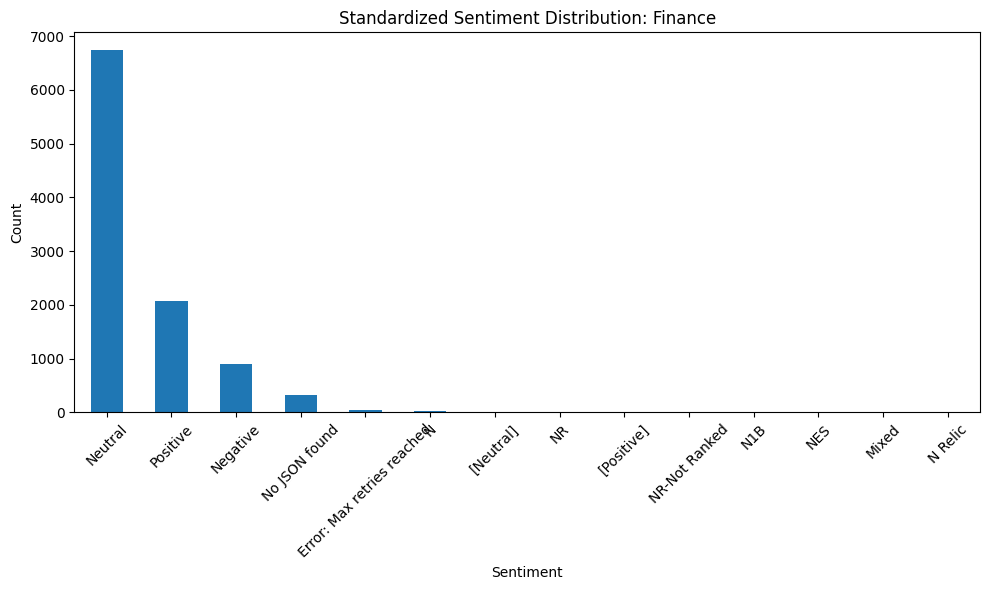

/var/folders/ct/rkyy0_0n4_jgwfz2mqk5gs8w0000gn/T/ipykernel_45728/3901214218.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


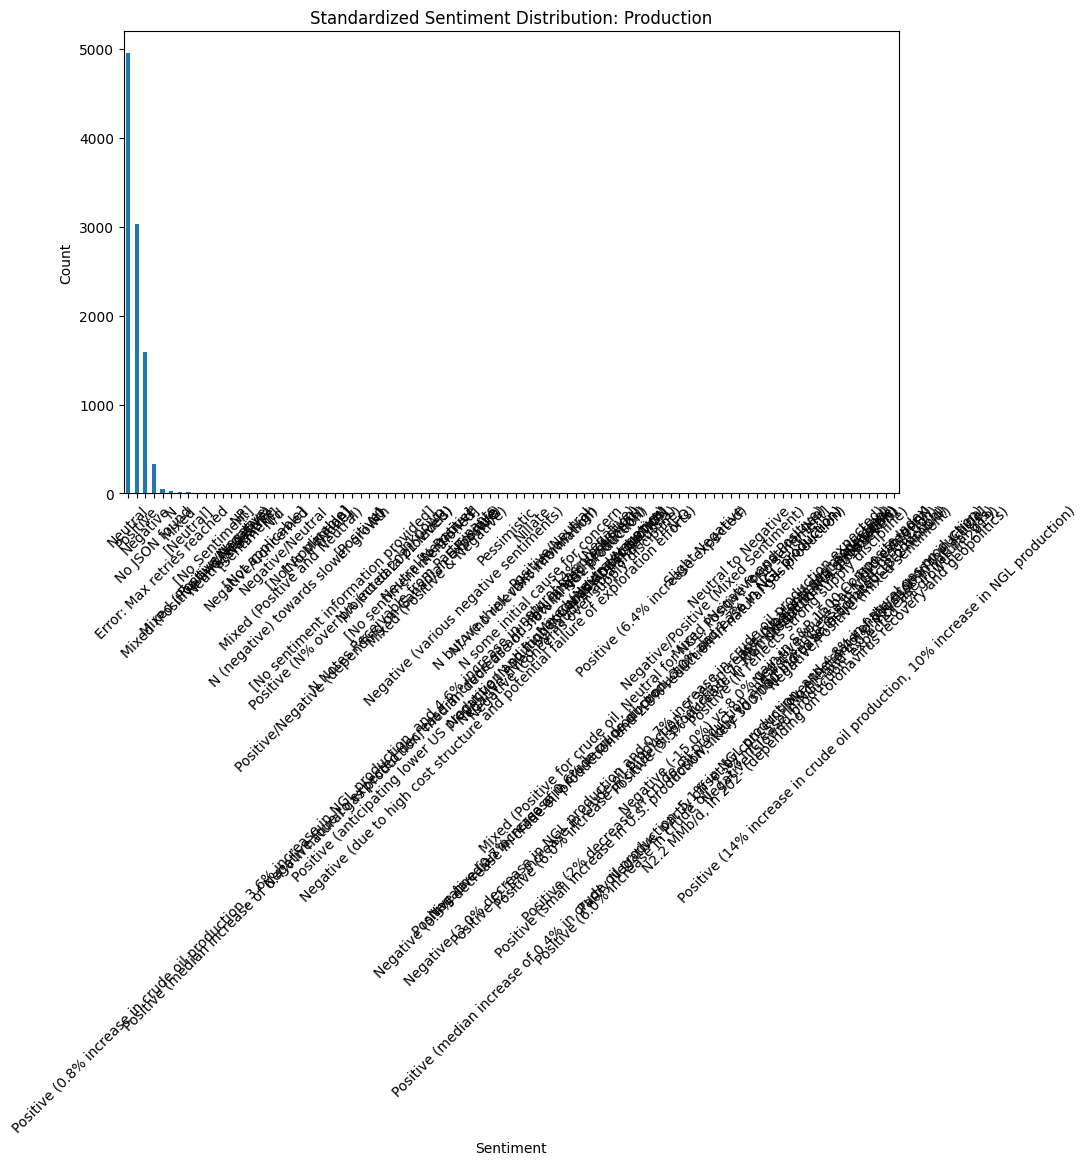

/var/folders/ct/rkyy0_0n4_jgwfz2mqk5gs8w0000gn/T/ipykernel_45728/3901214218.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


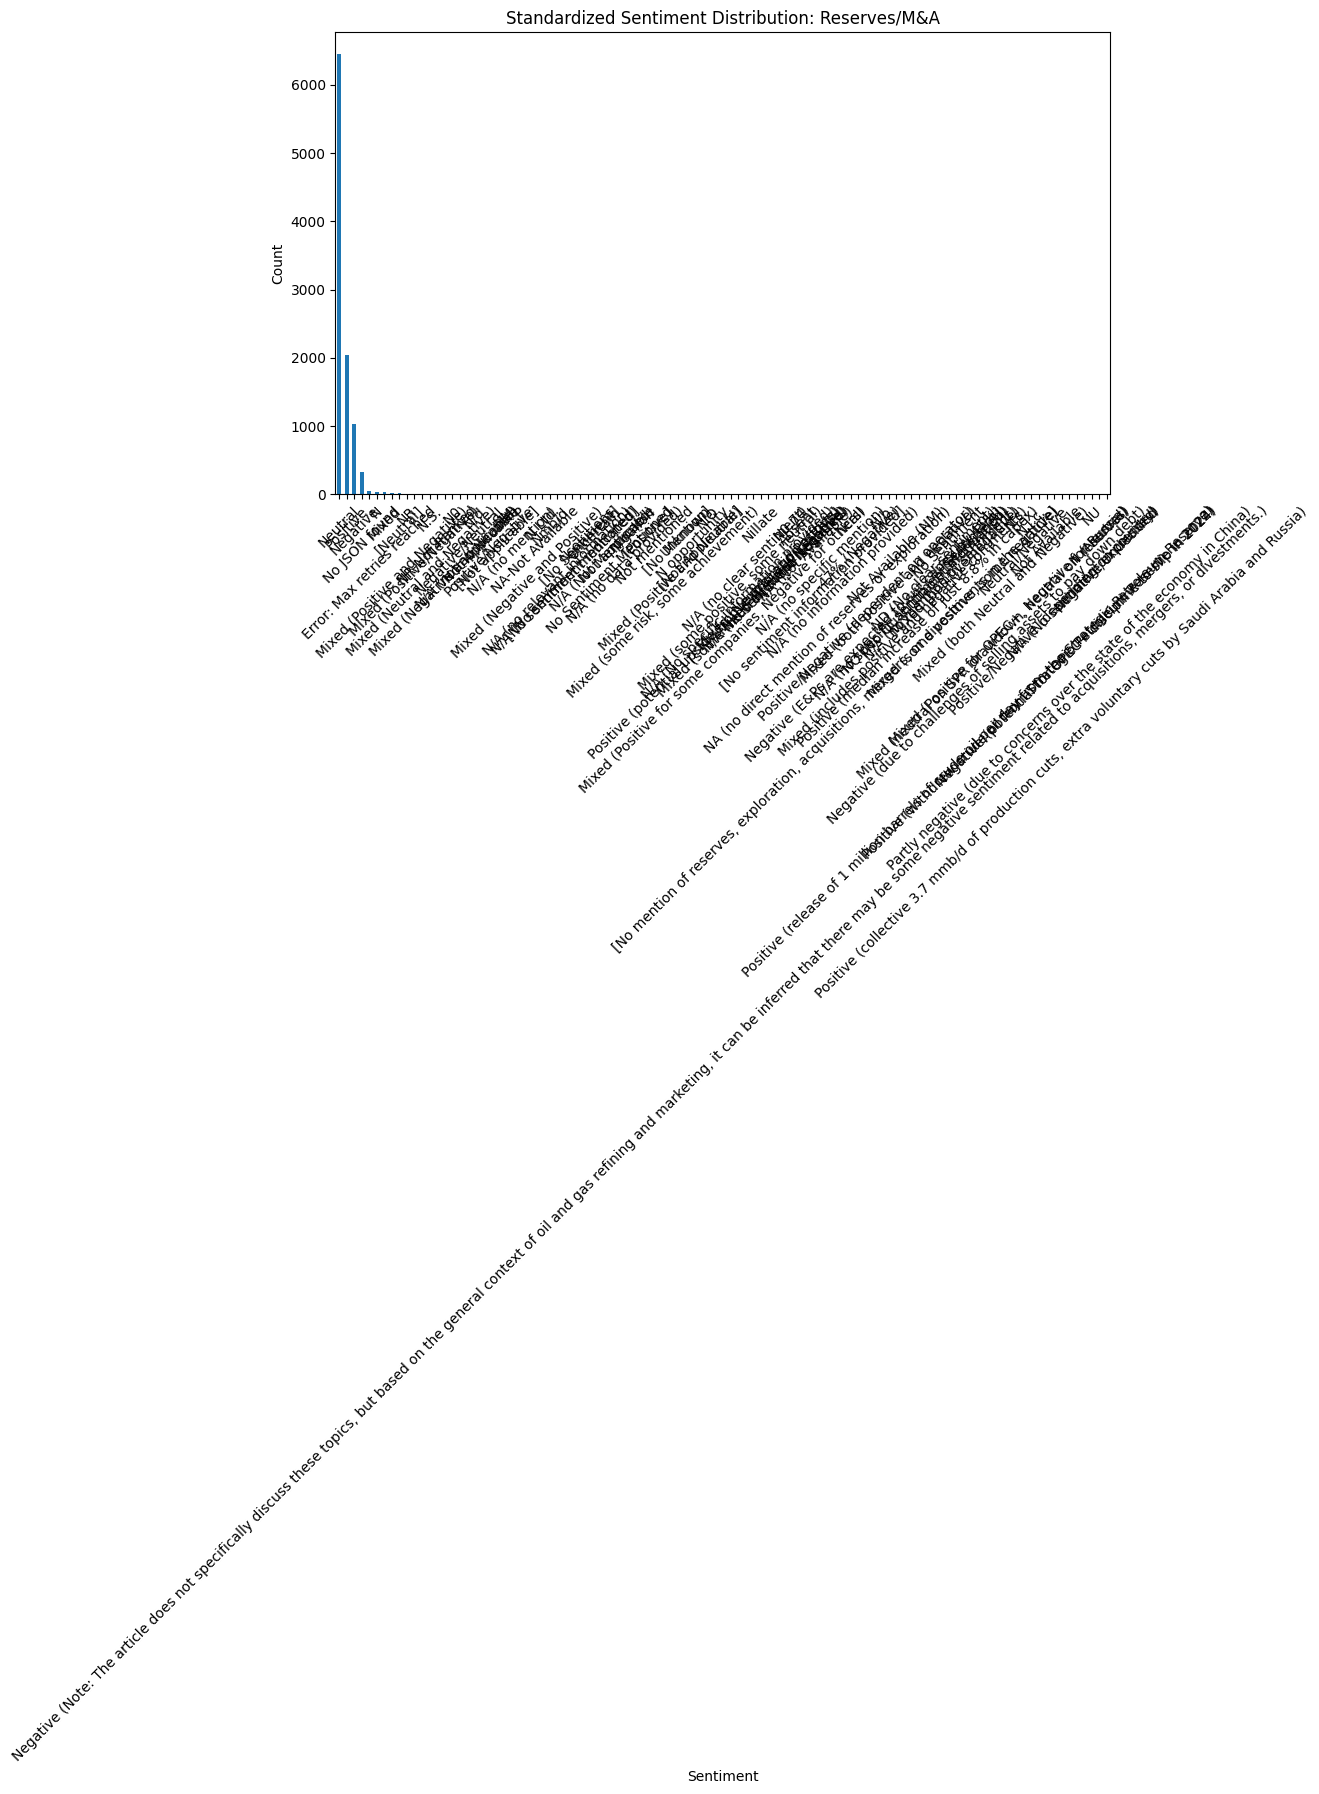

/var/folders/ct/rkyy0_0n4_jgwfz2mqk5gs8w0000gn/T/ipykernel_45728/3901214218.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


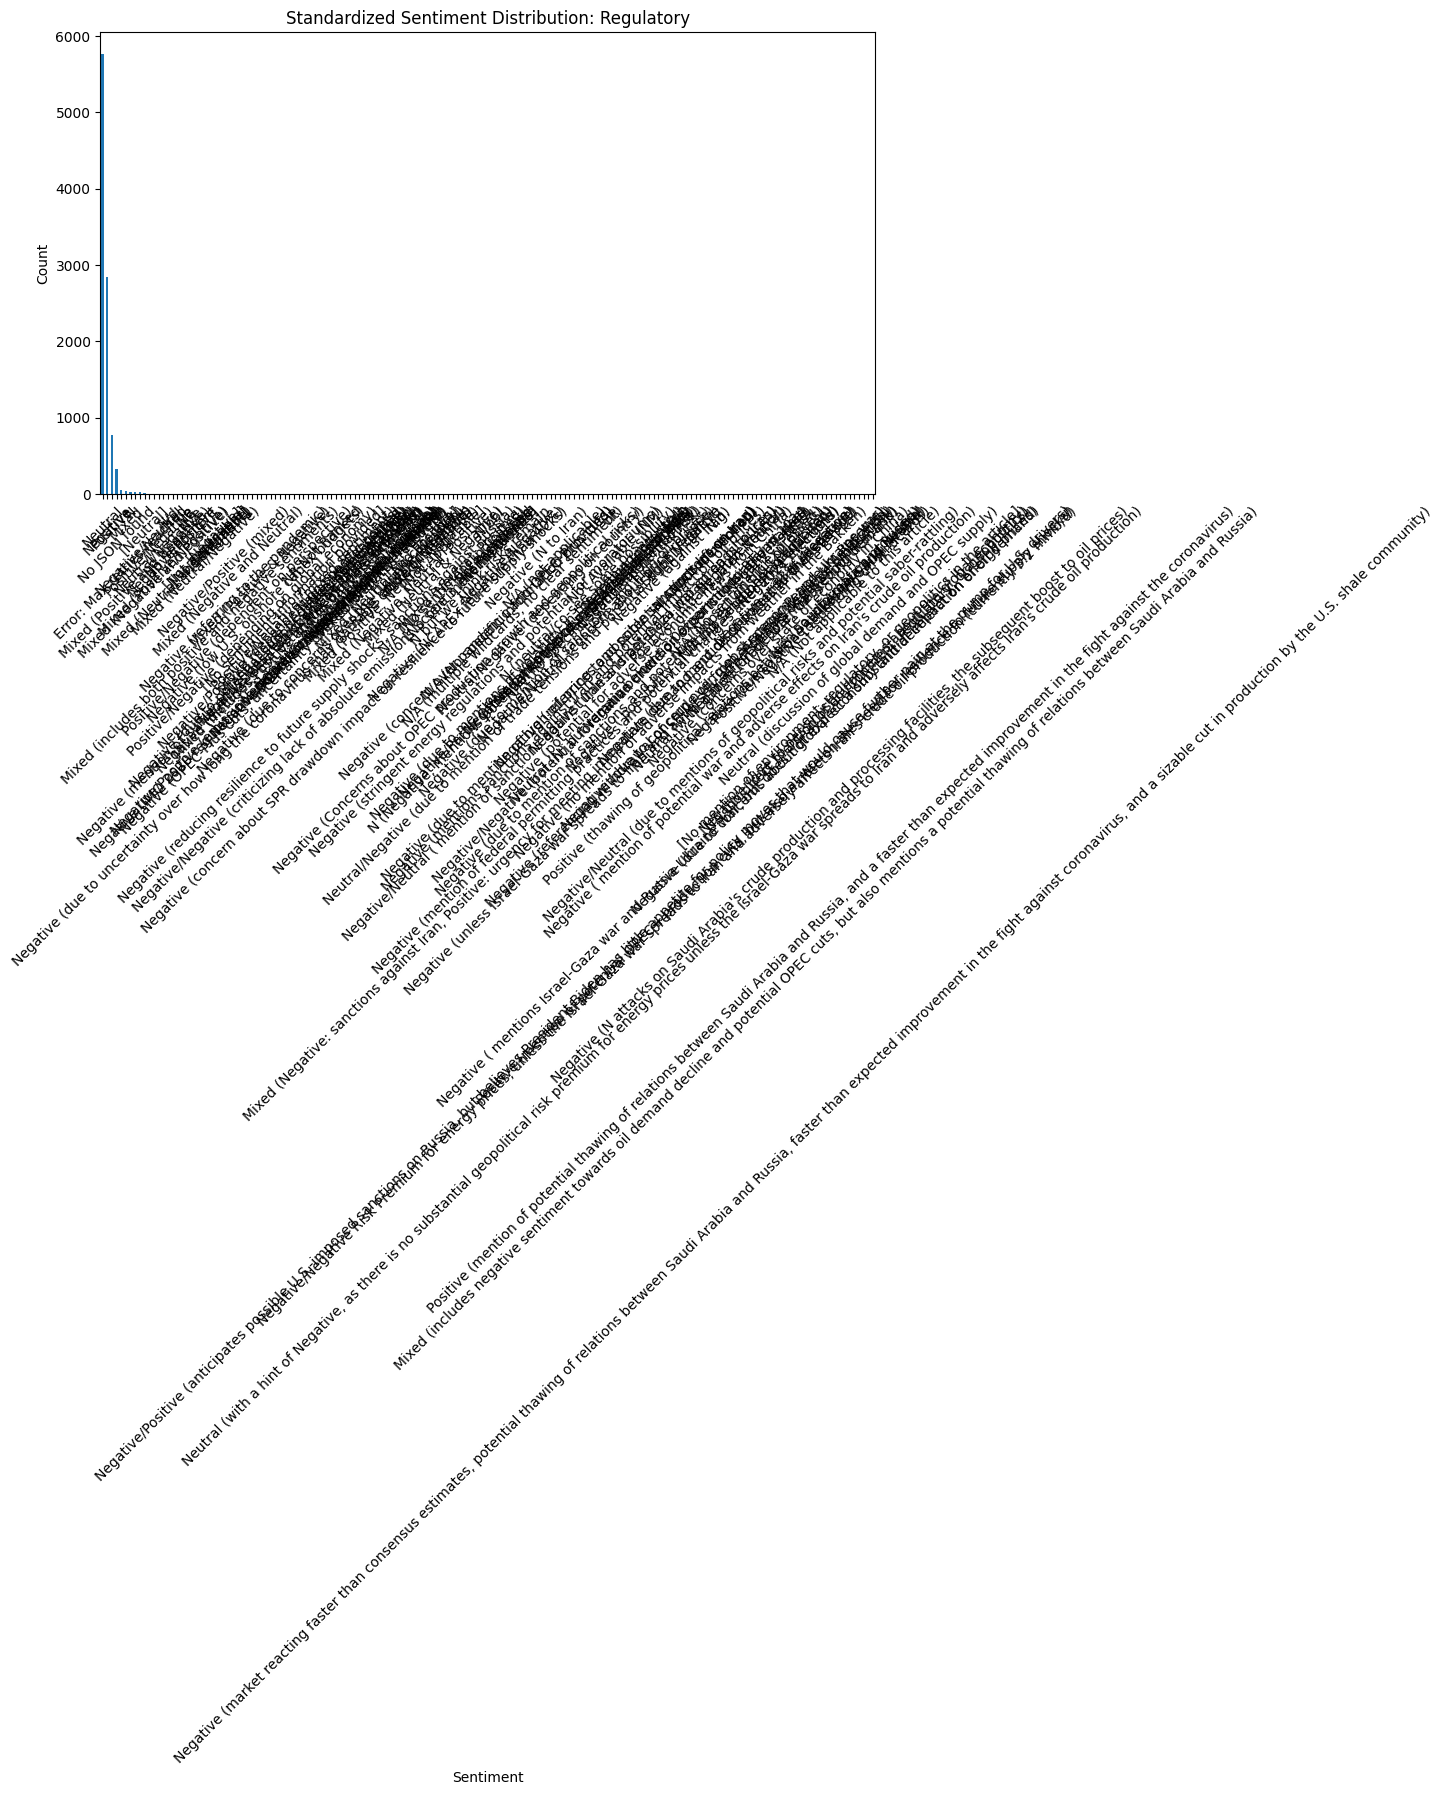

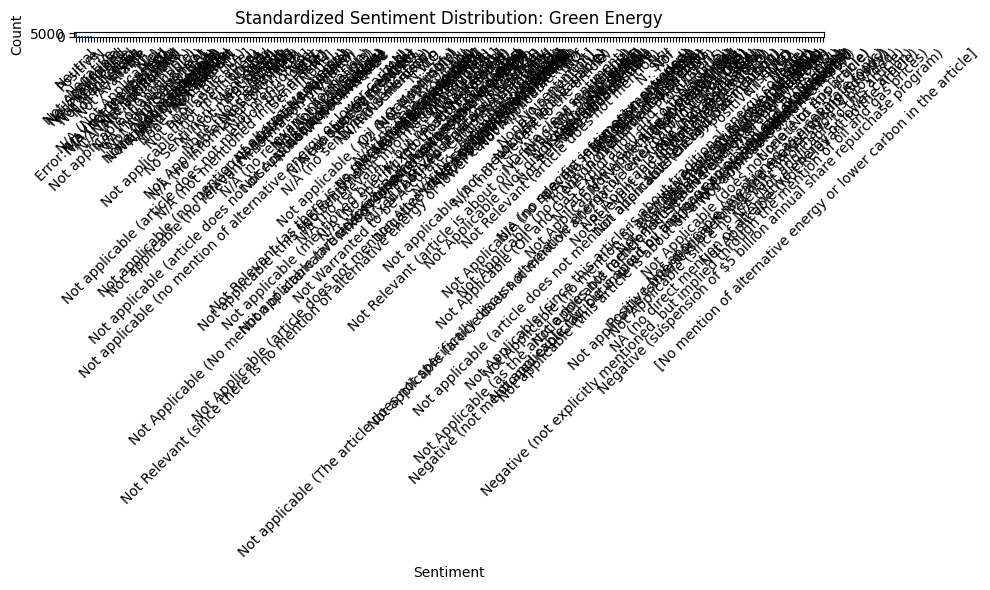

/var/folders/ct/rkyy0_0n4_jgwfz2mqk5gs8w0000gn/T/ipykernel_45728/3901214218.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


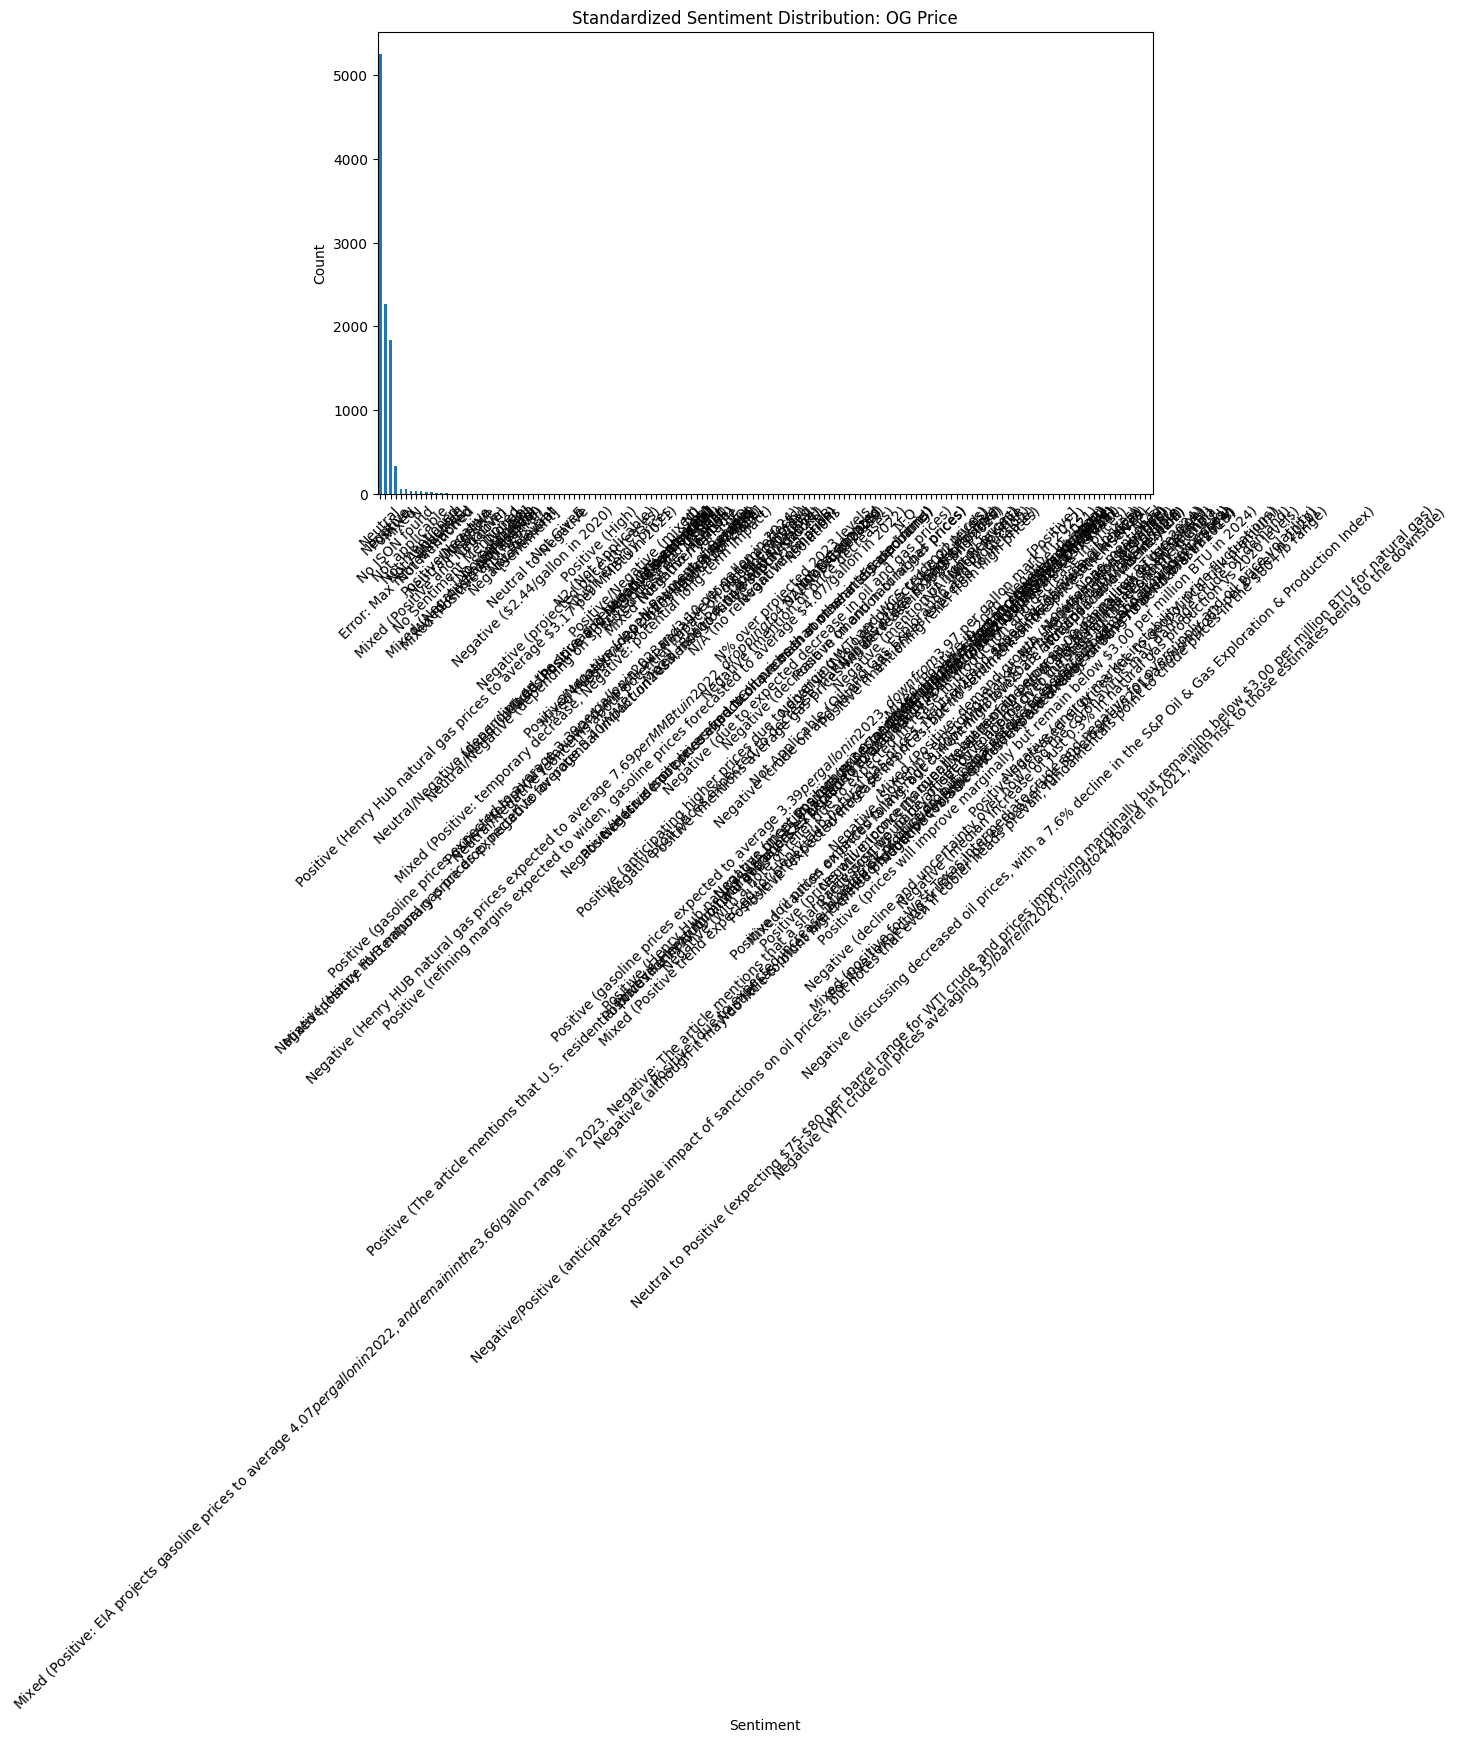

In [36]:
# 4. Function to plot sentiment distribution
def plot_sentiment_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot original and standardized distributions for comparison
for column in sentiment_columns:
    plot_sentiment_distribution(df_standardized, column, f'Standardized Sentiment Distribution: {column}')


In [37]:
def improved_standardize_sentiment(value):
    value = str(value).lower()
    
    # Positive sentiments
    if any(word in value for word in ['positive', 'increase', 'growth', 'improve', 'higher']):
        return 'Positive'
    
    # Negative sentiments
    elif any(word in value for word in ['negative', 'decrease', 'decline', 'lower', 'risk', 'concern']):
        return 'Negative'
    
    # Neutral sentiments
    elif any(word in value for word in ['neutral', 'unchanged', 'stable']):
        return 'Neutral'
    
    # Error categories
    elif 'error' in value or 'no json found' in value:
        return 'Error'
    
    # Default to Neutral if it does not fit any above criteria
    else:
        return 'Neutral'

# Apply the improved standardization to each sentiment column
for column in sentiment_columns:
    df_standardized[column] = df_standardized[column].apply(improved_standardize_sentiment)

# Print standardized value counts for each category
for column in sentiment_columns:
    print(f"\nStandardized value counts for {column}:")
    print(df_standardized[column].value_counts())



Standardized value counts for Finance:
Finance
Neutral     6768
Positive    2077
Negative     895
Error        385
Name: count, dtype: int64

Standardized value counts for Production:
Production
Neutral     5047
Positive    3079
Negative    1614
Error        385
Name: count, dtype: int64

Standardized value counts for Reserves/M&A:
Reserves/M&A
Neutral     6610
Positive    2080
Negative    1050
Error        385
Name: count, dtype: int64

Standardized value counts for Regulatory:
Regulatory
Neutral     5912
Negative    2966
Positive     862
Error        385
Name: count, dtype: int64

Standardized value counts for Green Energy:
Green Energy
Neutral     8039
Positive    1410
Error        385
Negative     291
Name: count, dtype: int64

Standardized value counts for OG Price:
OG Price
Neutral     5516
Negative    2300
Positive    1924
Error        385
Name: count, dtype: int64


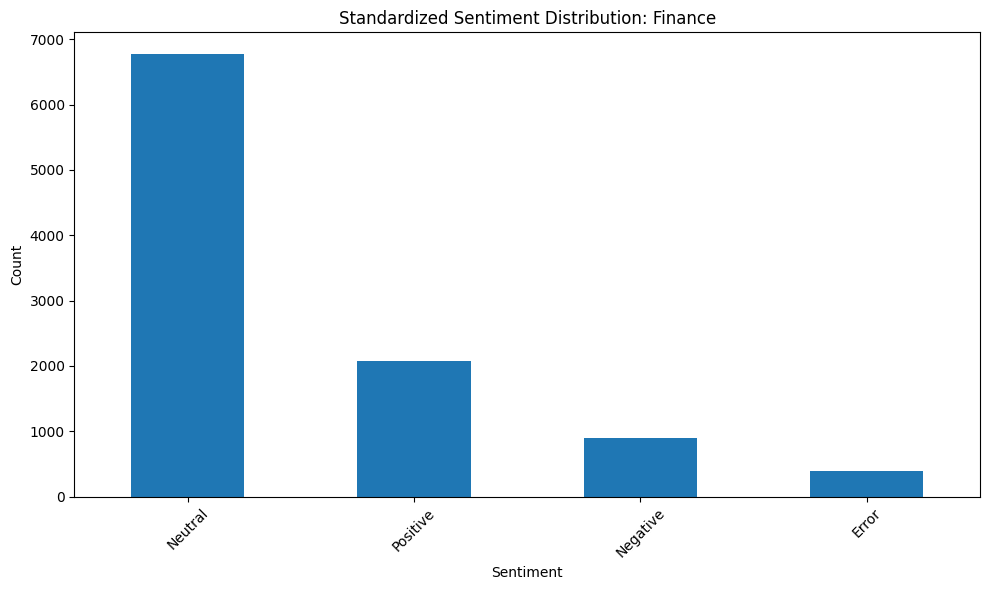

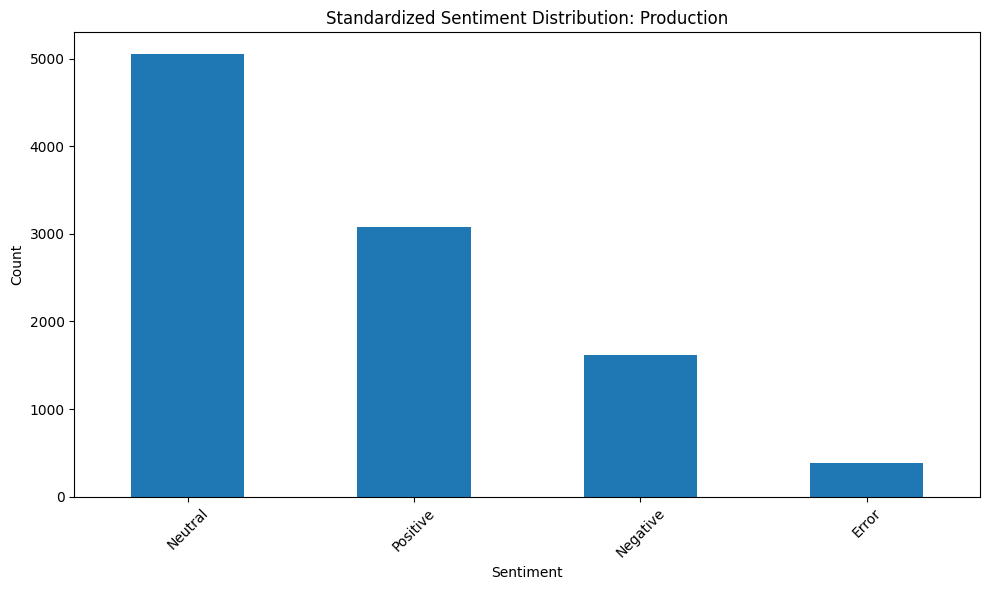

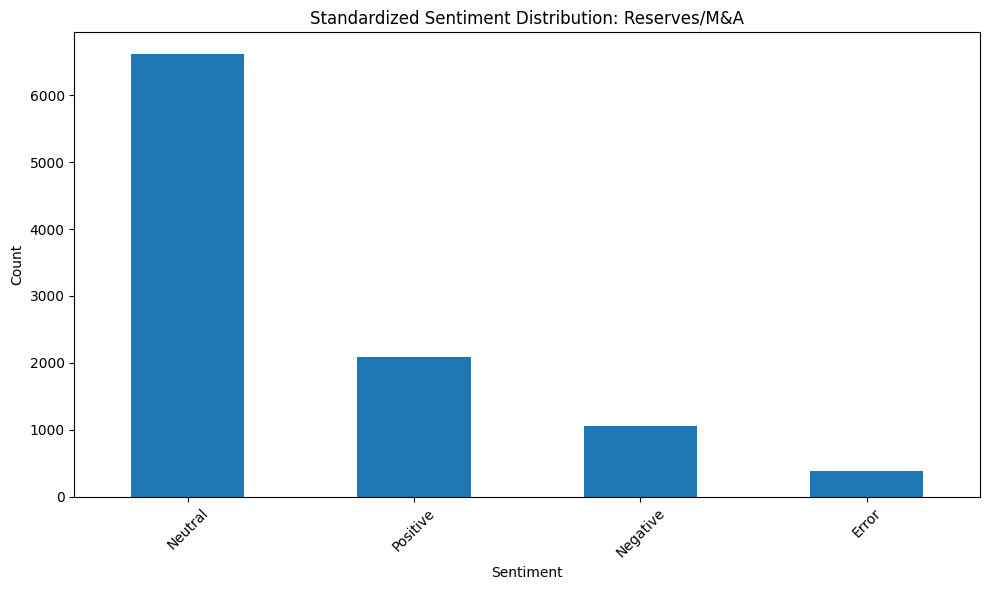

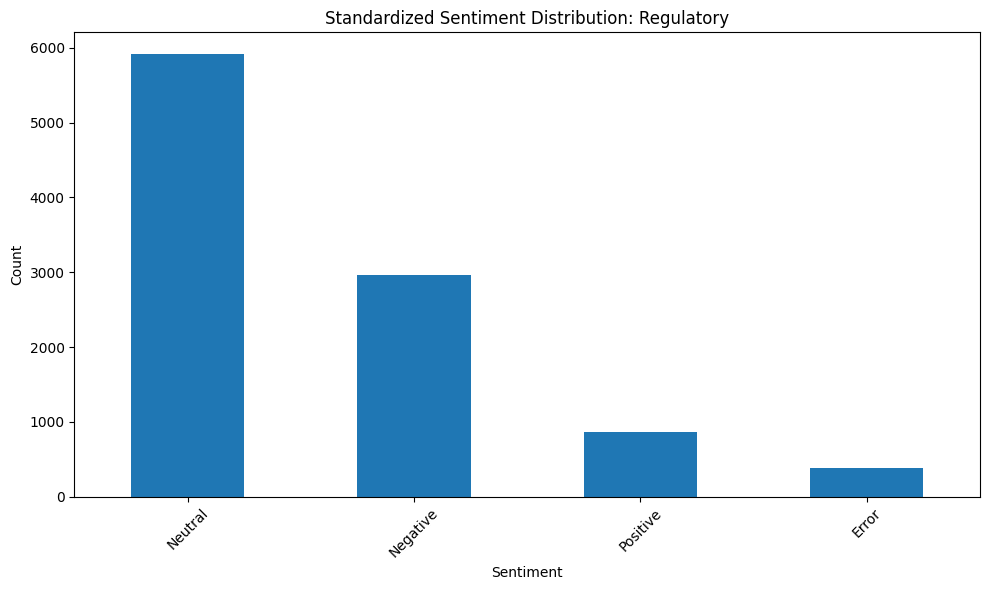

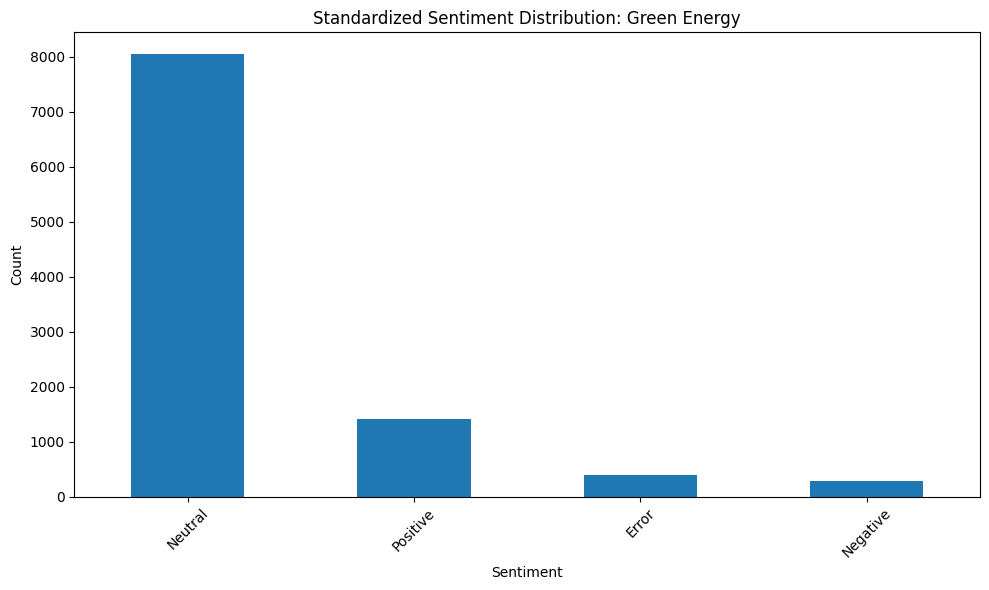

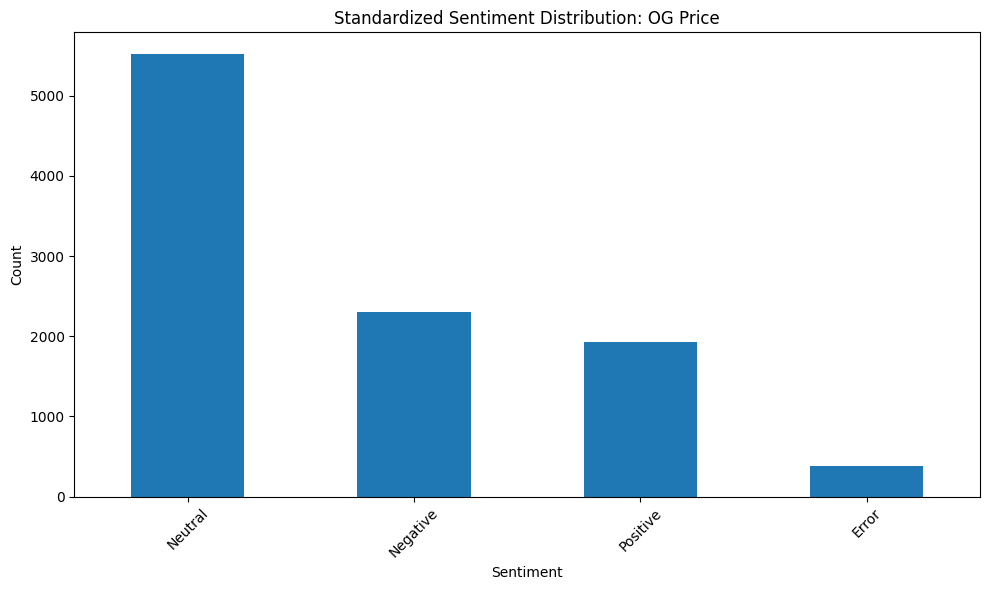

In [38]:
# 4. Function to plot sentiment distribution
def plot_sentiment_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot original and standardized distributions for comparison
for column in sentiment_columns:
    plot_sentiment_distribution(df_standardized, column, f'Standardized Sentiment Distribution: {column}')


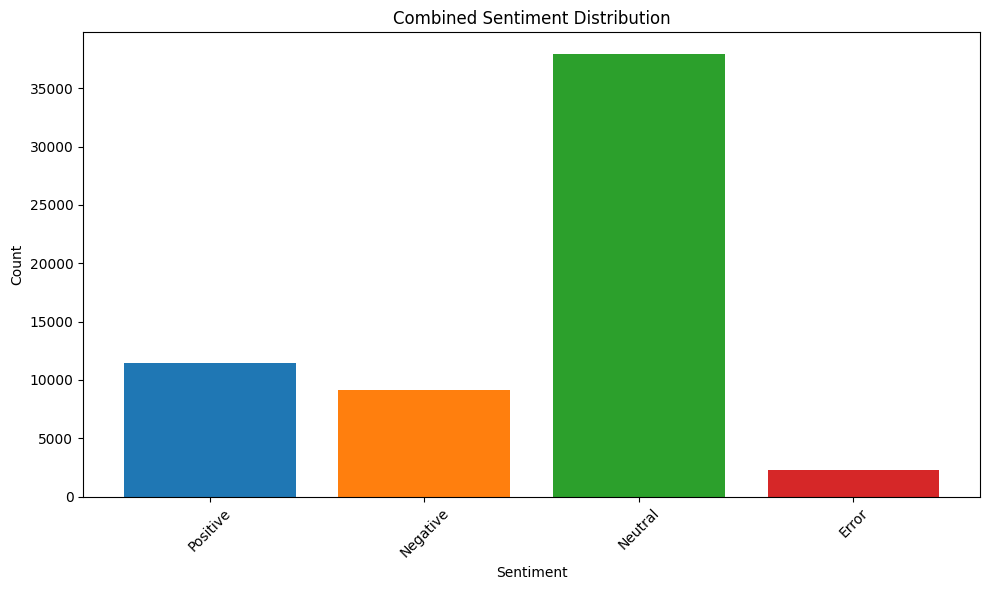

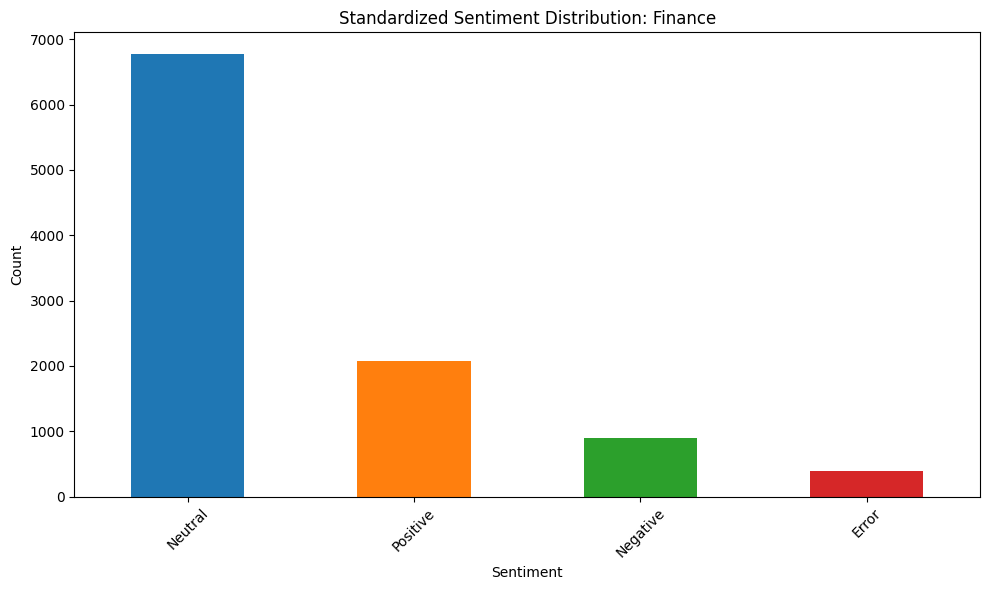

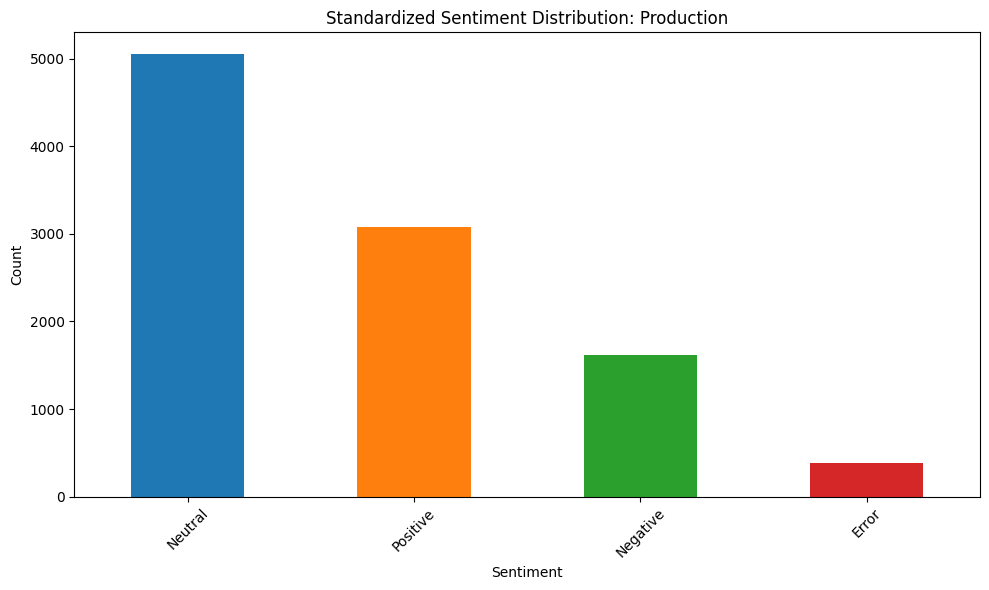

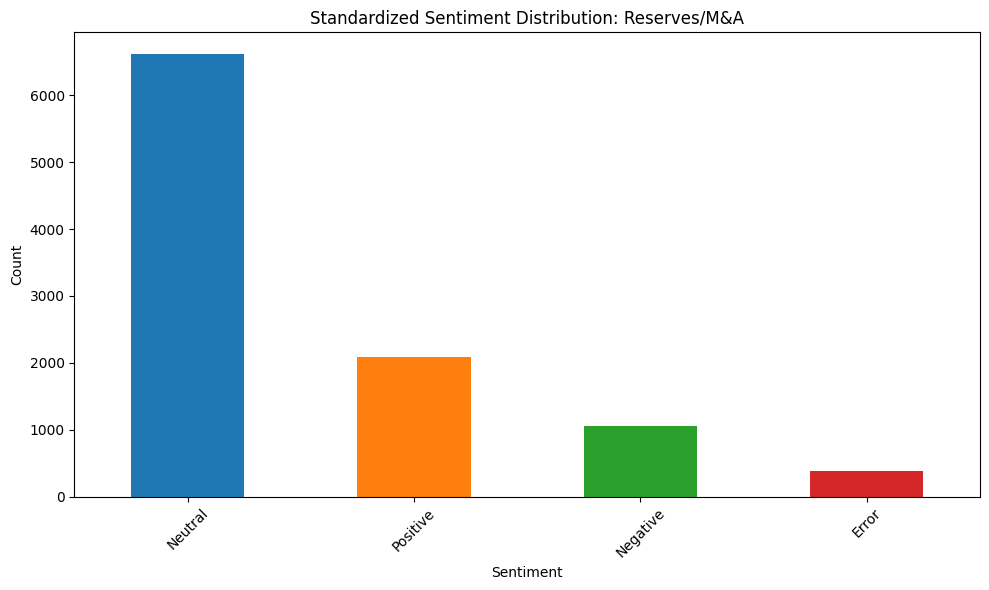

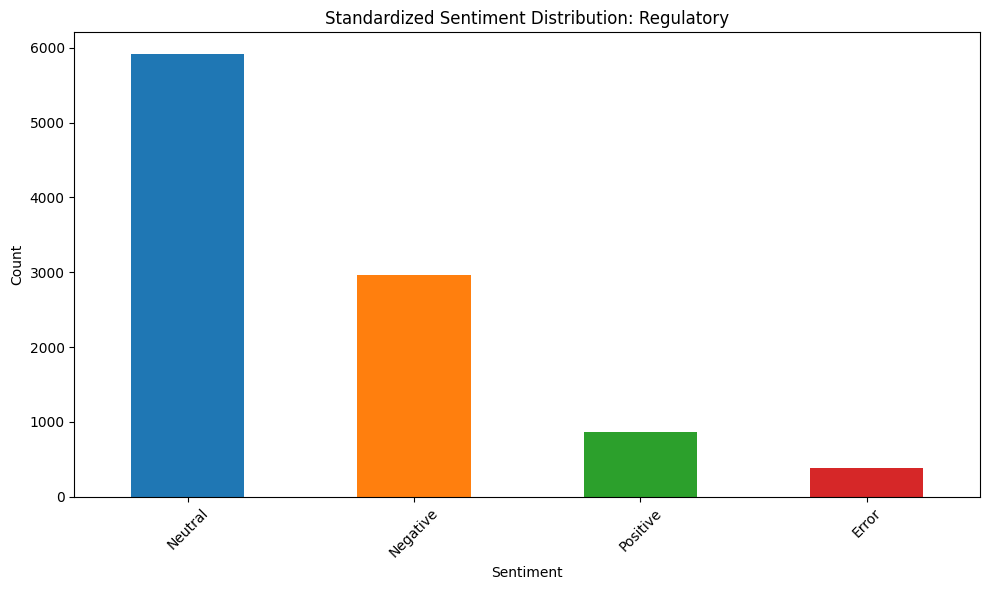

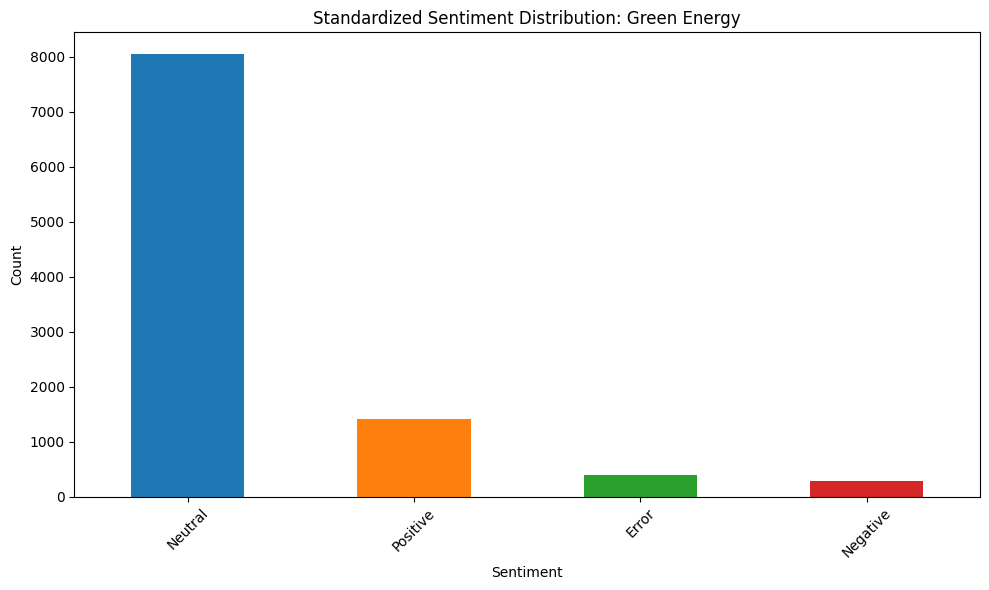

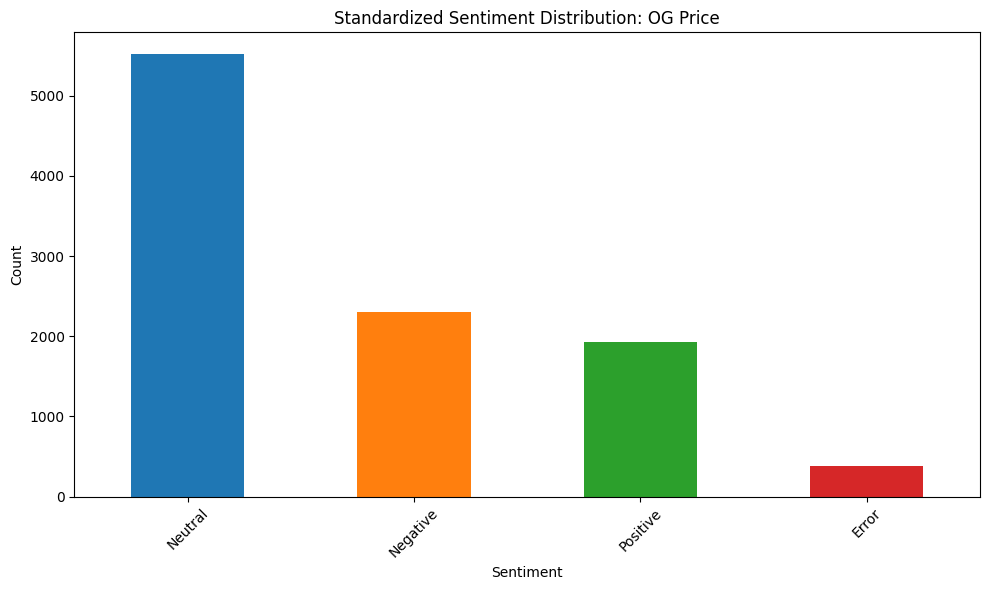

In [39]:
import matplotlib.pyplot as plt

# 1. Combine counts for each sentiment category across all columns
combined_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Error': 0}

for column in sentiment_columns:
    value_counts = df_standardized[column].value_counts()
    for sentiment, count in value_counts.items():
        if sentiment in combined_counts:
            combined_counts[sentiment] += count
        else:
            combined_counts[sentiment] = count

# 2. Plot the combined counts
def plot_combined_sentiment_distribution(counts, title):
    plt.figure(figsize=(10, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Unique colors for each sentiment
    plt.bar(counts.keys(), counts.values(), color=colors)
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_combined_sentiment_distribution(combined_counts, 'Combined Sentiment Distribution')

# Original individual plots for comparison (if needed)
def plot_sentiment_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for column in sentiment_columns:
    plot_sentiment_distribution(df_standardized, column, f'Standardized Sentiment Distribution: {column}')


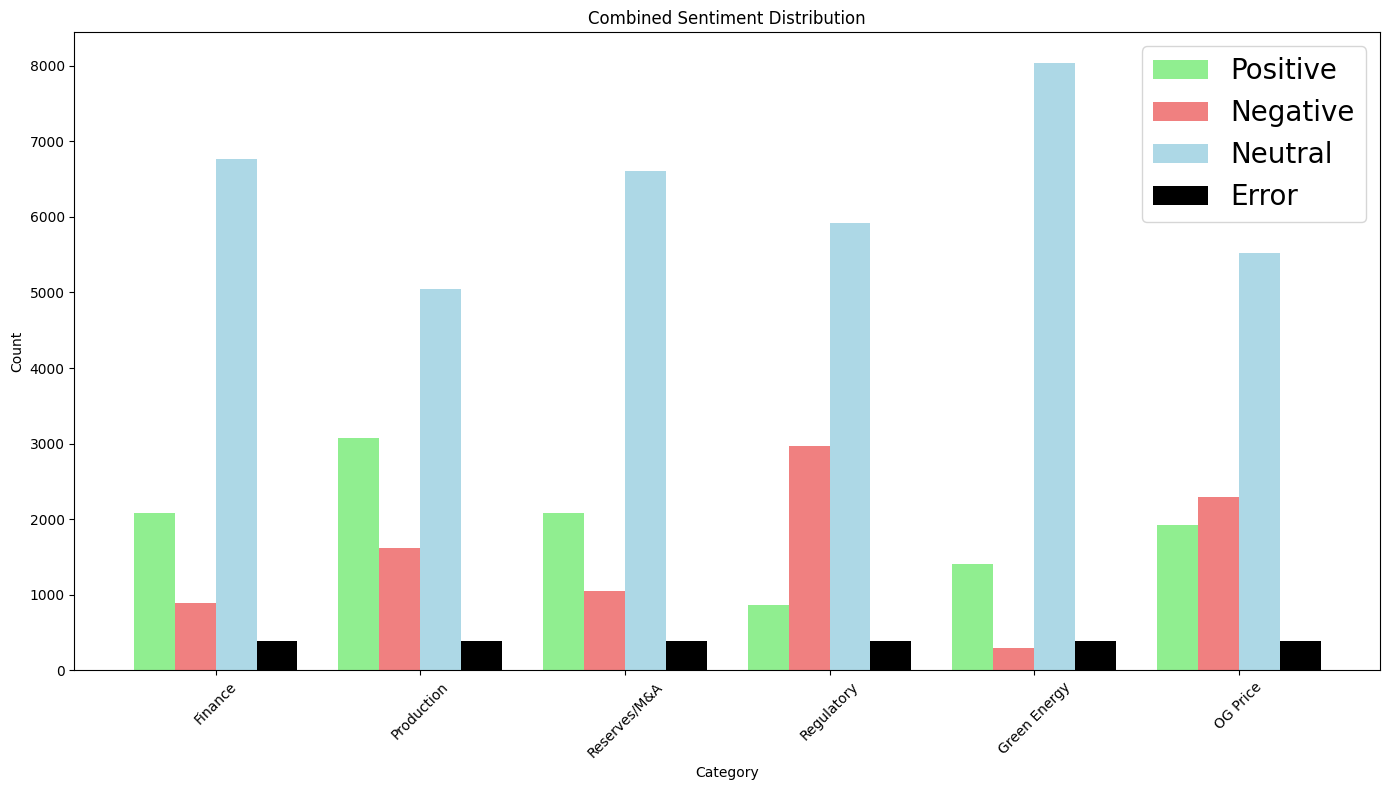

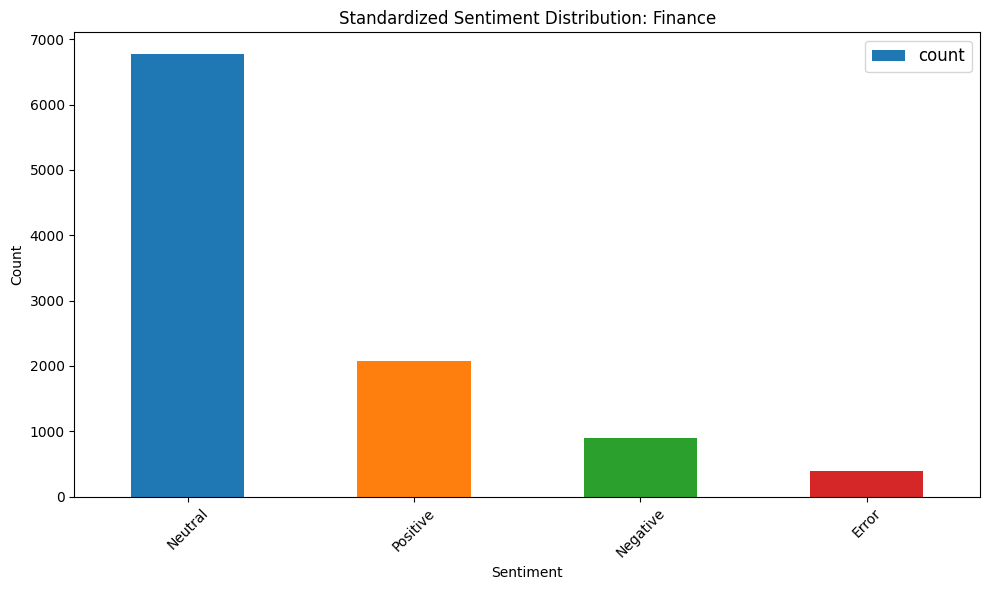

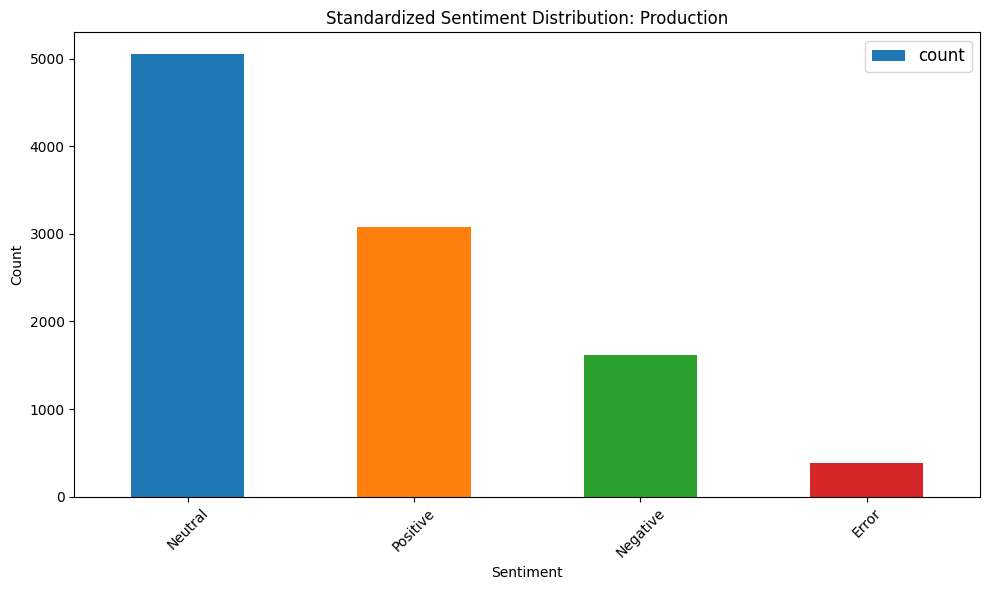

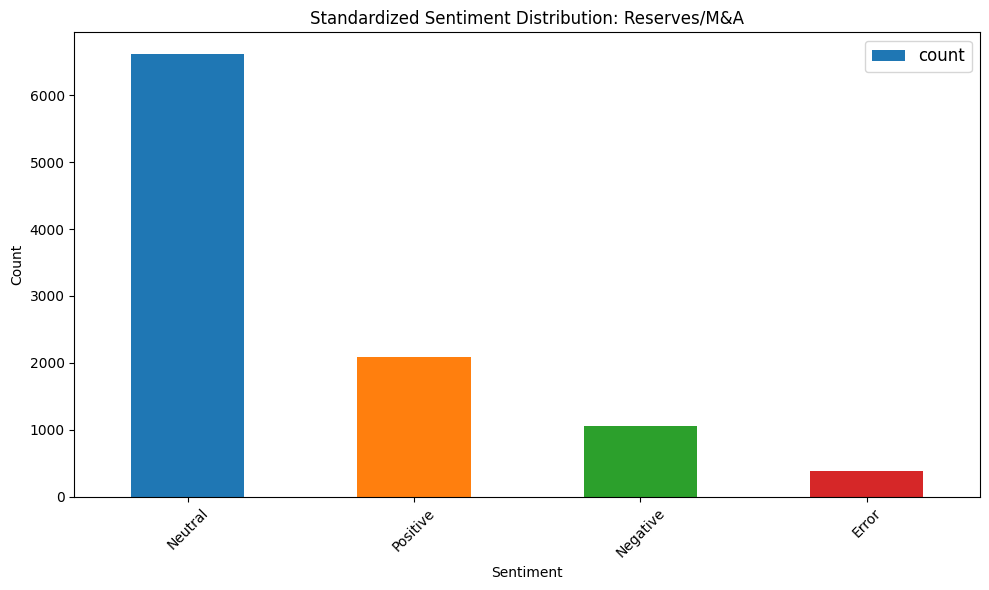

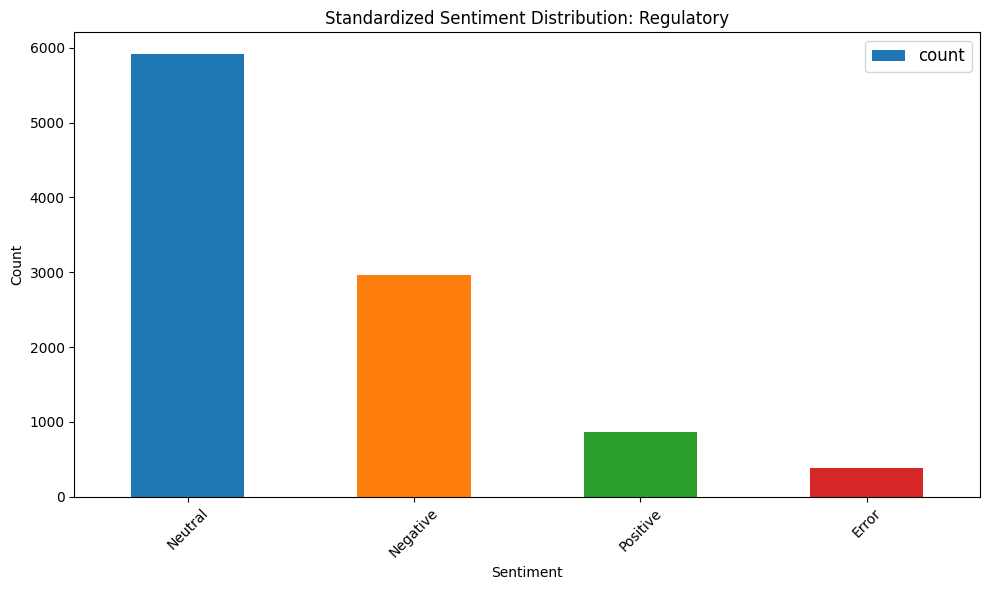

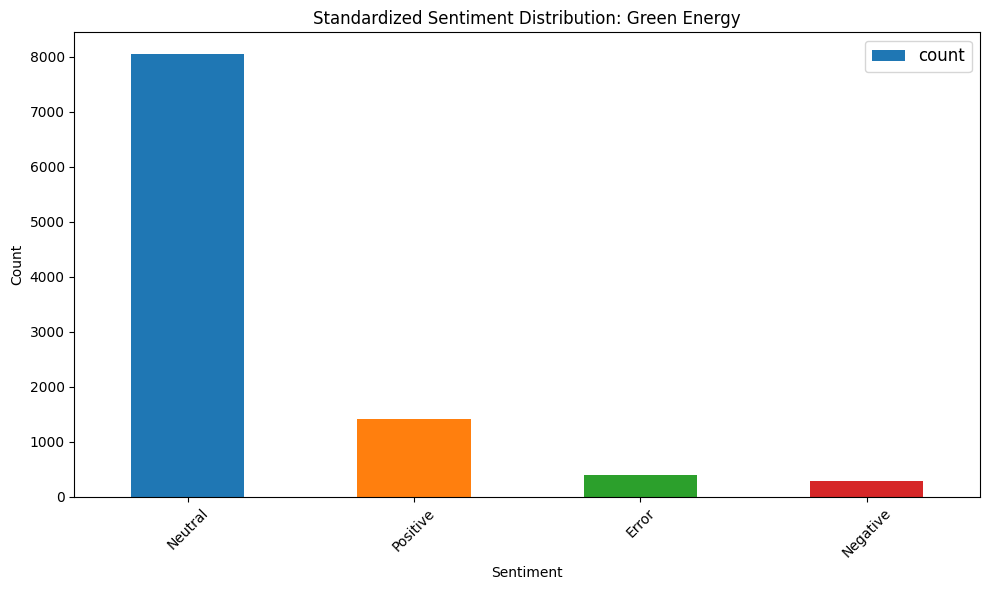

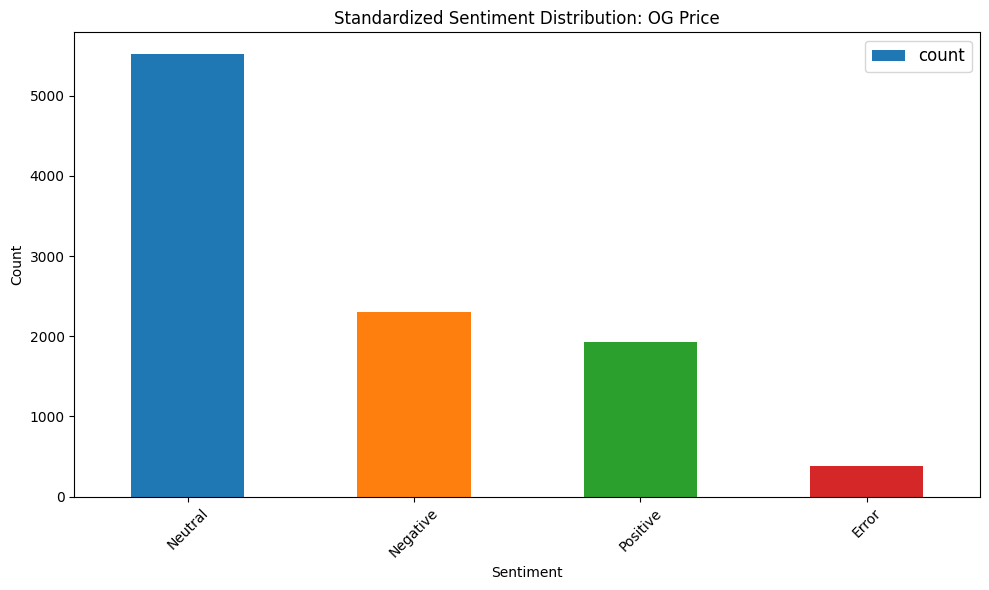

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame to store the counts for each sentiment category across all columns
category_sentiment_counts = pd.DataFrame(columns=['Category', 'Sentiment', 'Count'])

for column in sentiment_columns:
    value_counts = df_standardized[column].value_counts().reset_index()
    value_counts.columns = ['Sentiment', 'Count']
    value_counts['Category'] = column
    category_sentiment_counts = pd.concat([category_sentiment_counts, value_counts], ignore_index=True)

# Plot the combined counts using a grouped bar plot
def plot_combined_sentiment_distribution(data, title):
    plt.figure(figsize=(14, 8))
    
    categories = data['Category'].unique()
    sentiments = ['Positive', 'Negative', 'Neutral', 'Error']
    colors = ['lightgreen', 'lightcoral', 'lightblue', 'black']  # Unique colors for each sentiment
    
    bar_width = 0.2
    index = np.arange(len(categories))
    
    for i, sentiment in enumerate(sentiments):
        counts = []
        for category in categories:
            count = data[(data['Category'] == category) & (data['Sentiment'] == sentiment)]['Count'].sum()
            counts.append(count)
        plt.bar(index + i * bar_width, counts, bar_width, label=sentiment, color=colors[i])
    
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(index + bar_width * 1.5, categories, rotation=45)
    plt.legend(fontsize=20)  # Increase the legend font size
    plt.tight_layout()
    plt.show()

plot_combined_sentiment_distribution(category_sentiment_counts, 'Combined Sentiment Distribution')

# Optional: Plot individual sentiment distributions for each column
def plot_sentiment_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)  # Increase the legend font size
    plt.tight_layout()
    plt.show()

for column in sentiment_columns:
    plot_sentiment_distribution(df_standardized, column, f'Standardized Sentiment Distribution: {column}')


In [57]:
# Calculate the counts for each sentiment per category
positive_counts = category_sentiment_counts[category_sentiment_counts['Sentiment'] == 'Positive'].set_index('Category')['Count']
negative_counts = category_sentiment_counts[category_sentiment_counts['Sentiment'] == 'Negative'].set_index('Category')['Count']

# Calculate the ratio and difference between positive and negative counts
# Calculate the ratio and difference between positive and negative counts
ratios = (positive_counts / negative_counts).astype(float).round(1)
differences = (positive_counts - negative_counts).astype(float).round(1)

# Create a DataFrame to display the results
balance_df = pd.DataFrame({
    'Positive': positive_counts,
    'Negative': negative_counts,
    'Ratio (Positive/Negative)': ratios,
    'Difference (Positive - Negative)': differences
})

# Display the DataFrame
balance_df


Positive Negative  Ratio (Positive/Negative)  \
Category                                                    
Finance          2077      895                        2.3   
Production       3079     1614                        1.9   
Reserves/M&A     2080     1050                        2.0   
Regulatory        862     2966                        0.3   
Green Energy     1410      291                        4.8   
OG Price         1924     2300                        0.8   

              Difference (Positive - Negative)  
Category                                        
Finance                                 1182.0  
Production                              1465.0  
Reserves/M&A                            1030.0  
Regulatory                             -2104.0  
Green Energy                            1119.0  
OG Price                                -376.0

In [58]:
df_standardized

Source Unique_ID Ticker        Date  URL   Finance  \
0      Investment Research      IR-1    MRO  2024-05-16  NaN   Neutral   
1      Investment Research      IR-2    EOG  2024-05-14  NaN  Positive   
2      Investment Research      IR-3    EOG  2024-05-11  NaN  Positive   
3      Investment Research      IR-4    DVN  2024-05-11  NaN   Neutral   
4      Investment Research      IR-5    COP  2024-05-07  NaN   Neutral   
...                    ...       ...    ...         ...  ...       ...   
10120    Earnings Call Q&A    EQ-338    XOM  2021-02-02  NaN   Neutral   
10121    Earnings Call Q&A    EQ-339    COP  2021-02-02  NaN     Error   
10122    Earnings Call Q&A    EQ-340    EOG  2019-05-03  NaN   Neutral   
10123    Earnings Call Q&A    EQ-341   SHEL  2019-05-02  NaN     Error   
10124    Earnings Call Q&A    EQ-342    COP  2019-04-30  NaN   Neutral   

      Production Reserves/M&A Regulatory Green Energy  OG Price  \
0       Positive      Neutral    Neutral      Neutral   Neutral   
1        Neutral      Neutral    Neutral     Negative   Neutral   
2        Neutral     Positive   Negative      Neutral  Positive   
3       Negative      Neutral    Neutral      Neutral  Negative   
4       Positive      Neutral   Negative      Neutral  Positive   
...          ...          ...        ...          ...       ...   
10120   Positive      Neutral    Neutral     Positive   Neutral   
10121      Error        Error      Error        Error     Error   
10122   Positive     Positive    Neutral      Neutral   Neutral   
10123      Error        Error      Error        Error     Error   
10124   Positive      Neutral    Neutral      Neutral   Neutral   

      Reserves / Exploration / Acquisitions / Mergers / Divestitures  
0                                                    NaN              
1                                                    NaN              
2                                                    NaN              
3                                                    NaN              
4                                                    NaN              
...                                                  ...              
10120                                                NaN              
10121                                                NaN              
10122                                                NaN              
10123                                                NaN              
10124                                                NaN              

[10125 rows x 12 columns]

In [83]:
!pip install plotly


In [85]:
import plotly.express as px
import pandas as pd

# Flatten the DataFrame to have one row per sentiment per source
df_flat = df_standardized.melt(id_vars=['Source'], 
                               value_vars=['Finance', 'Production', 'Reserves/M&A', 'Regulatory', 'Green Energy', 'OG Price'],
                               var_name='Category', value_name='Sentiment')

# Aggregate the sentiment counts by source
sentiment_counts_by_source = df_flat.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Calculate the total count for each source
total_counts_by_source = sentiment_counts_by_source.groupby('Source')['Count'].sum()

# Calculate the percentage for each count
sentiment_counts_by_source['Percentage'] = sentiment_counts_by_source['Count'] / sentiment_counts_by_source['Source'].map(total_counts_by_source) * 100

# Create the bar plot using Plotly
fig = px.bar(sentiment_counts_by_source, 
             x='Source', 
             y='Count', 
             color='Sentiment', 
             text=sentiment_counts_by_source['Percentage'].apply(lambda x: f'{x:.1f}%'),
             barmode='group',
             color_discrete_map={'Error': 'lightcoral', 'Negative': 'lightblue', 'Neutral': 'lightgreen', 'Positive': 'black'})

# Update the layout for a white background
fig.update_layout(
    title='Total Sentiment Counts by Source',
    xaxis_title='Source',
    yaxis_title='Total Count',
    legend_title='Sentiment',
    legend=dict(font=dict(size=12)),
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update the text annotations
fig.update_traces(textposition='outside')

fig.show()


In [90]:
import plotly.express as px
import pandas as pd

# Flatten the DataFrame to have one row per sentiment per source
df_flat = df_standardized.melt(id_vars=['Source'], 
                               value_vars=['Finance', 'Production', 'Reserves/M&A', 'Regulatory', 'Green Energy', 'OG Price'],
                               var_name='Category', value_name='Sentiment')

# Aggregate the sentiment counts by source
sentiment_counts_by_source = df_flat.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Calculate the total count for each source
total_counts_by_source = sentiment_counts_by_source.groupby('Source')['Count'].sum()

# Calculate the percentage for each count
sentiment_counts_by_source['Percentage'] = sentiment_counts_by_source['Count'] / sentiment_counts_by_source['Source'].map(total_counts_by_source) * 100

# Define the desired order of sources
desired_order = ['Earnings Call Presentations', 'Earnings Call Q&A', 'Investment Research',  'ProQuest', 'SEC Filings']

# Create the bar plot using Plotly
fig = px.bar(sentiment_counts_by_source, 
             x='Source', 
             y='Count', 
             color='Sentiment', 
             text=sentiment_counts_by_source['Percentage'].apply(lambda x: f'{x:.1f}%'),
             barmode='group',
             color_discrete_map={'Error': 'black', 'Negative': 'lightcoral', 'Neutral': 'lightblue', 'Positive': 'lightgreen'},
             category_orders={'Source': desired_order})

# Update the layout for a white background and specific plot size
fig.update_layout(
    title='Total Sentiment Counts by Source',
    xaxis_title='Source',
    yaxis_title='Total Count',
    legend_title='Sentiment',
    legend=dict(font=dict(size=12)),
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Update the text annotations
fig.update_traces(textposition='outside')

fig.show()
